In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Using GradientTape

In [3]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [4]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [8]:
time = tf.Variable(3.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

## Linear classifier in pure TF

In [10]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

In [19]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [12]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
    np.ones((num_samples_per_class, 1), dtype="float32")))

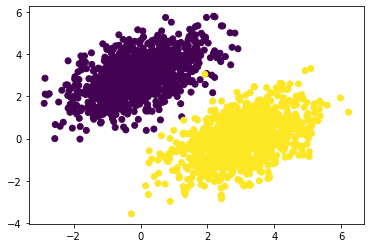

In [20]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [21]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [22]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [23]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [24]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [25]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.9774
Loss at step 1: 0.4753
Loss at step 2: 0.1717
Loss at step 3: 0.1278
Loss at step 4: 0.1153
Loss at step 5: 0.1070
Loss at step 6: 0.0999
Loss at step 7: 0.0934
Loss at step 8: 0.0875
Loss at step 9: 0.0820
Loss at step 10: 0.0771
Loss at step 11: 0.0726
Loss at step 12: 0.0684
Loss at step 13: 0.0646
Loss at step 14: 0.0612
Loss at step 15: 0.0580
Loss at step 16: 0.0551
Loss at step 17: 0.0525
Loss at step 18: 0.0501
Loss at step 19: 0.0479
Loss at step 20: 0.0459
Loss at step 21: 0.0440
Loss at step 22: 0.0423
Loss at step 23: 0.0408
Loss at step 24: 0.0394
Loss at step 25: 0.0381
Loss at step 26: 0.0369
Loss at step 27: 0.0359
Loss at step 28: 0.0349
Loss at step 29: 0.0340
Loss at step 30: 0.0332
Loss at step 31: 0.0324
Loss at step 32: 0.0317
Loss at step 33: 0.0311
Loss at step 34: 0.0306
Loss at step 35: 0.0300
Loss at step 36: 0.0296
Loss at step 37: 0.0291
Loss at step 38: 0.0287
Loss at step 39: 0.0284


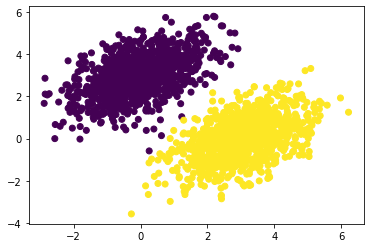

In [26]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

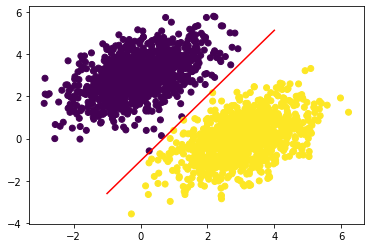

In [30]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]